A walkthrough of some of the cool things you can do in GeoPandas and why

First, import the library. Imports always go at the top of the project

In [1]:
import geopandas as gpd
import pandas as pd

Next, we write what's called a _magic command_. That's a piece of code that tells Jupyter to do something differently. Magic commands are always preceded with the `%` sign.

`%COMMAND ARGUMENT1, ARGUMENT2...`

In this case, we're simply going to tell Jupyter to display graphics "inline" as we make them. If we don't do that, then we won't be able to see the graphics without exporing them to a file, which is tedious if you're making lots of graphics or trying to iterate over a single one unti it's perfect.

In [2]:
%matplotlib inline

GeoPandas works a lot like pandas. Reading a file is simple. Where in Pandas you used the `pd.read_csv()` method, here we use the `gpd.read_file` method.

In [3]:
states = gpd.read_file("../data/states")

Note that above I didn't write the name of the file like `../folder/filename.something`. That's because we're dealing with a [shapefile](https://en.wikipedia.org/wiki/Shapefile) which is really a folder with a bunch of files, rather than a single file. When reading a in a shapefile, you can just refer to the folder and GeoPandas will figure it out.

You can do `GeoDataFrame.head()` and it works a lot like `DataFrame.head()`.

In [4]:
states.head()

,GEOID,STUSPS,NAME,geometry
0,54,WV,West Virginia,"POLYGON ((1561571.961 -483477.971, 1561619.813..."
1,12,FL,Florida,"MULTIPOLYGON (((1300534.538 -1450505.843, 1300..."
2,17,IL,Illinois,"POLYGON ((742564.486 -445238.183, 743359.700 -..."
3,27,MN,Minnesota,"POLYGON ((245479.802 186204.457, 245483.060 18..."
4,24,MD,Maryland,"POLYGON ((1914704.978 -379436.546, 1914710.426..."


The `geomoetry` column is the most important. All GeoDataFrames have `geometry` columns. This column can contain `Point` data--like the locations of cities or specific addresses, or `Polygon` data. In this case, we have polygons. Let's take a look with the handy `DataFrame.plot()` method.

<Axes: >

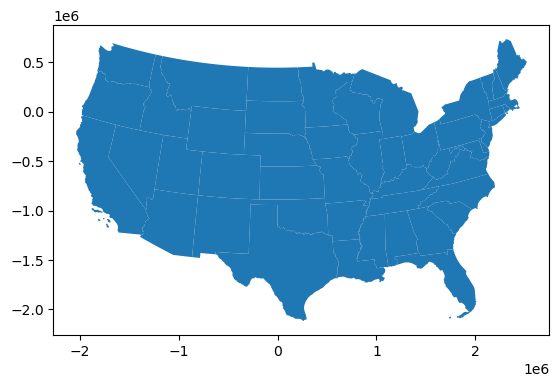

In [5]:
states.plot()

Cool! Note that we can do a lot of things to make this look better. A lot of the aesthetics can be set right inside of the `plot` function. Others have to be set after you build the initial plot. 

By convention, we call the map object an `Axes` object. (Pronounced AXE-eez). It doesn't refer to the lines in a chart that mark the scale. It's a [Matplotlib concept](https://matplotlib.org/api/axes_api.html).

I won't go into what all these options mean, but check out the documention on how to plot at [the GeoPandas documentation site](http://geopandas.org/mapping.html).

Text(0.5, 1.0, "What a nice lookin' map")

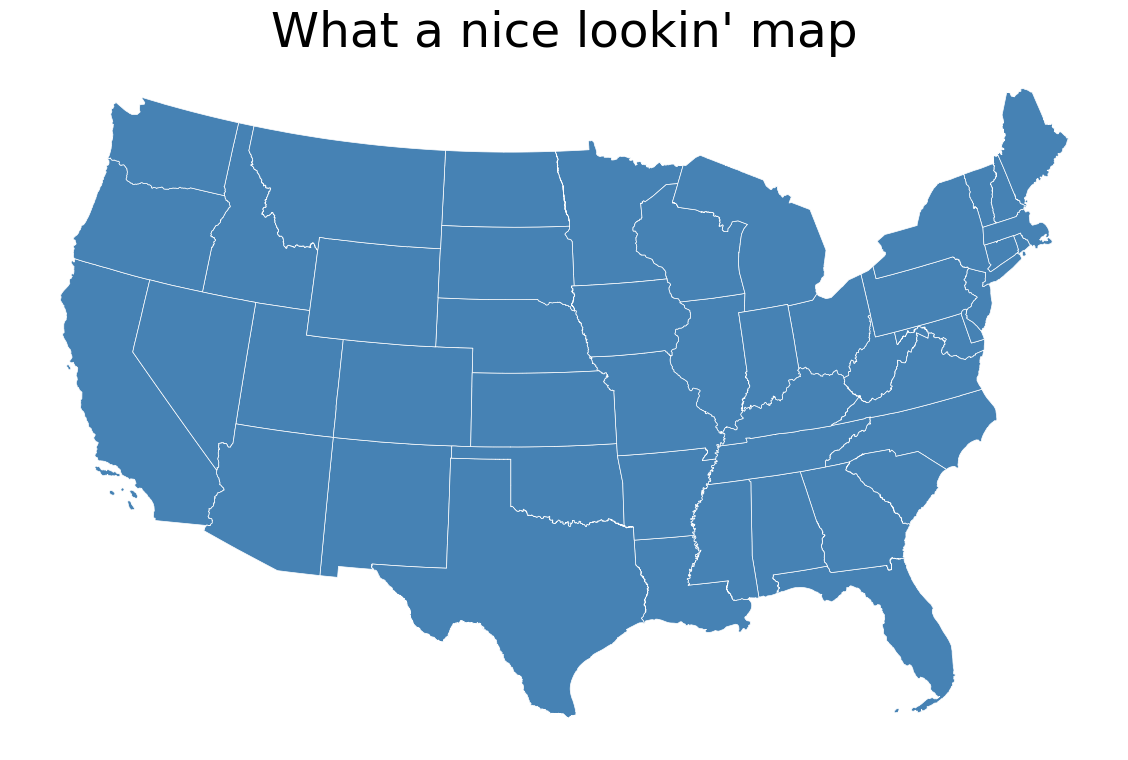

In [6]:
ax = states.plot(
    # the size of the plot in inches
    figsize = (16,9),
    # most CSS colors will work here
    color = "steelblue",
    # line color
    edgecolor = "white",
    linewidth = 0.5
)

ax.axis("off")
ax.set_title(
    "What a nice lookin' map",
    fontsize = 35
)

Let's do it again with a counties map. You'll see how it's basically the same operation.

In [7]:
counties = gpd.read_file("../data/counties/")

counties.head()

,GEOID,NAME,NAMELSAD,geometry
0,31039,Cuming,Cuming County,"POLYGON ((246290.041 -328619.667, 246286.510 -..."
1,53069,Wahkiakum,Wahkiakum County,"POLYGON ((-1770686.984 398793.664, -1771124.91..."
2,35011,De Baca,De Baca County,"POLYGON ((-422754.447 -1210188.449, -422784.93..."
3,31109,Lancaster,Lancaster County,"POLYGON ((260193.977 -463717.021, 260172.000 -..."
4,31129,Nuckolls,Nuckolls County,"POLYGON ((146978.459 -544334.301, 146978.432 -..."


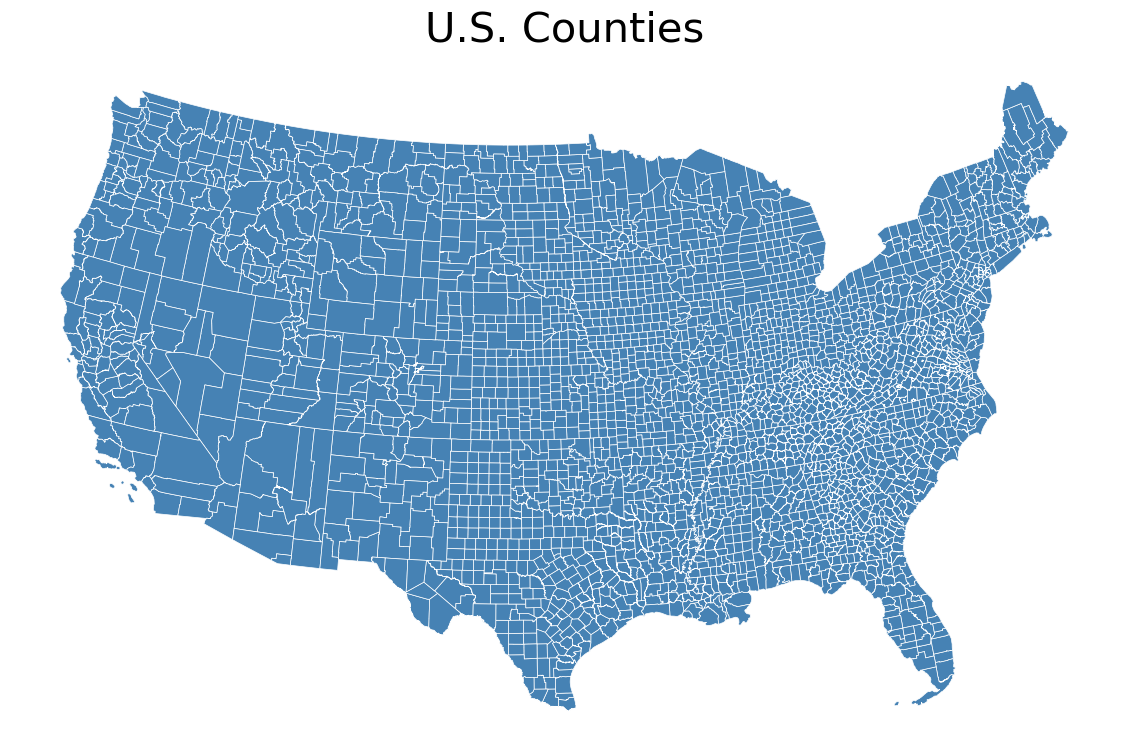

In [8]:
# read in the file and go straight to plotting!
ax = counties.plot(
    figsize = (16,9),
    color = "steelblue",
    # line color
    edgecolor = "white",
    linewidth = 0.5
)

ax.axis("off")

ax.set_title(
    "U.S. Counties",
    fontsize = 30
);

**Making thematic maps with your merging powers**

I have a CSV of bigfoot sightings from the "official" [Geographic Database of Bigfood/Sasquatch Sightings and Reports](https://www.bfro.net/GDB/)

In [9]:
bigfoot = pd.read_csv("../data/bigfoot.csv")

Note that I use Pandas to open this file because it's not a GeoDataFrame...yet

In [10]:
bigfoot.head(1)

,state,sightings
0,Montana,47


To make it a GeoDataFrame, we'll need to merge the bigfoot data with one of our shapefiles. We'll use the state shapefile from above because we can use the state name as a key. Take a look at it again:

In [11]:
states.head(1)

,GEOID,STUSPS,NAME,geometry
0,54,WV,West Virginia,"POLYGON ((1561571.961 -483477.971, 1561619.813..."


In [12]:
bigfoot_geo = states.merge(
    bigfoot,
    left_on = "NAME",
    right_on = "state"
)

bigfoot_geo

,GEOID,STUSPS,NAME,geometry,state,sightings
0,54,WV,West Virginia,"POLYGON ((1561571.961 -483477.971, 1561619.813...",West Virginia,102
1,12,FL,Florida,"MULTIPOLYGON (((1300534.538 -1450505.843, 1300...",Florida,325
2,17,IL,Illinois,"POLYGON ((742564.486 -445238.183, 743359.700 -...",Illinois,298
3,27,MN,Minnesota,"POLYGON ((245479.802 186204.457, 245483.060 18...",Minnesota,73
4,24,MD,Maryland,"POLYGON ((1914704.978 -379436.546, 1914710.426...",Maryland,35
5,44,RI,Rhode Island,"MULTIPOLYGON (((2284754.210 36016.088, 2284698...",Rhode Island,5
6,16,ID,Idaho,"POLYGON ((-1320390.644 120880.552, -1320386.43...",Idaho,87
7,33,NH,New Hampshire,"POLYGON ((2174741.054 220735.669, 2174745.020 ...",New Hampshire,16
8,37,NC,North Carolina,"POLYGON ((1570933.077 -826582.735, 1570940.814...",North Carolina,97
9,50,VT,Vermont,"POLYGON ((2077303.749 265450.633, 2077297.944 ...",Vermont,9


<Axes: >

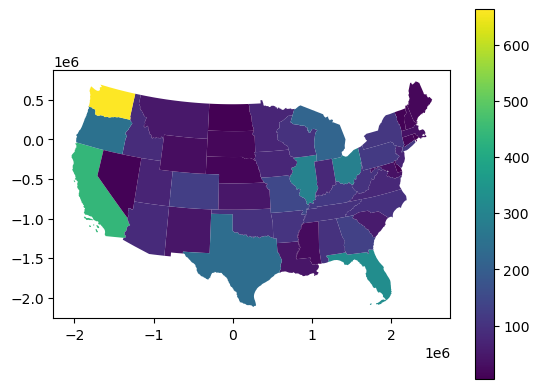

In [13]:
bigfoot_geo.plot(
    column = "sightings",
    legend = True
)

Nice! But the color scheme is just awful. Let's use the [colormaps](https://matplotlib.org/users/colormaps.html) from matplotlib.

Text(0.5, 1.0, 'Bigfoot sightings')

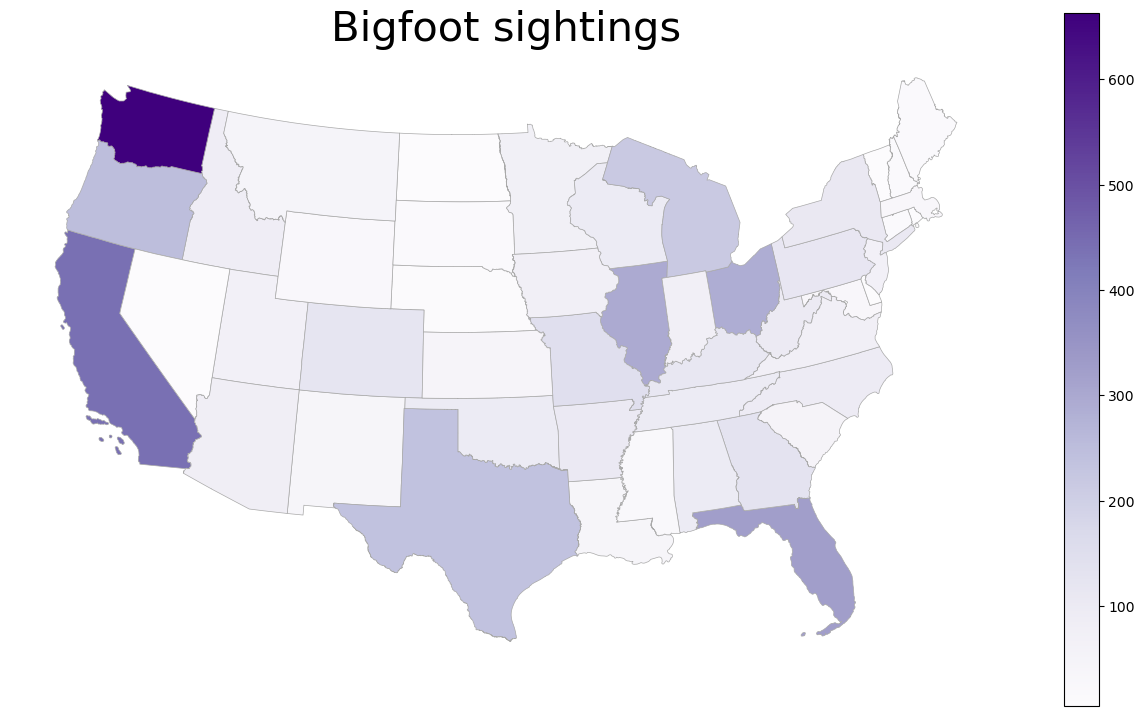

In [14]:
ax = bigfoot_geo.plot(
    legend = True,
    column = "sightings",
    cmap = "Purples",
    edgecolor = "darkgray",
    linewidth = 0.5,
    figsize = (16,9)
)

ax.axis("off")

ax.set_title(
    "Bigfoot sightings",
    fontsize = 30
)

Want to save it as a file? It's a bit of an odd process but it's not hard.

In [15]:
# first, get the "Figure" from the plot object.
fig = ax.get_figure()

# then, use the savefig method on that Figure object
fig.savefig("../output/bigfoot.png")

